In [1]:
# Imports

import pandas as pd
import numpy as np
import os
import time
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt

import dtreeviz
import six
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

In [2]:
# Load data

df = pd.read_csv(os.path.join('..', 'Resources', 'Created_Files', 'Feature_selected_df.csv'))
df

,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response
0,23,0,1,29648.0,22,1
1,74,0,1,2630.0,68,0
2,22,0,1,35674.0,116,0
3,26,0,0,27920.0,120,0
4,44,1,0,31630.0,129,0
...,...,...,...,...,...,...
500435,28,0,1,2630.0,135,1
500436,59,0,1,2630.0,237,1
500437,33,1,0,29282.0,273,1
500438,45,0,1,61984.0,184,1


In [3]:
# Define X

X = df.drop('Response', axis=1)
X.head(3)

,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage
0,23,0,1,29648.0,22
1,74,0,1,2630.0,68
2,22,0,1,35674.0,116


In [4]:
# Define y

y = df['Response']
y.value_counts()

1    250220
0    250220
Name: Response, dtype: int64

In [5]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Scale the dataset

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Decision Tree

start_time = time.time()

max_depth = 4
model = tree.DecisionTreeClassifier(max_depth = max_depth)
model = model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

end_time = time.time()

In [8]:
# Evaluation

acc_train = accuracy_score(y_train, y_pred_train)
b_acc_train = balanced_accuracy_score(y_train, y_pred_train)

acc = accuracy_score(y_test, y_pred)
b_acc = balanced_accuracy_score(y_test, y_pred)

cm = cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Predicted 0", "Predicted 1"])
                     
classification_report = classification_report(y_test, y_pred)
                     
elapsed_time  = end_time - start_time

print(f'''Decision Tree Performance - Depth: {max_depth}

Train:
Accuracy: {round(acc_train*100,2)}%
Balanced_Accuracy: {round(b_acc_train*100,2)}%

Test:
Accuracy: {round(acc*100,2)}%
Balanced_Accuracy: {round(b_acc*100,2)}%

Confusion Matrix:
{cm_df}

Classification Report:
{classification_report}

Training Time: {round(elapsed_time,1)} Seconds''')

Decision Tree Performance - Depth: 4

Train:
Accuracy: 79.11%
Balanced_Accuracy: 79.1%

Test:
Accuracy: 78.84%
Balanced_Accuracy: 78.87%

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        38532        24145
Actual 1         2327        60106

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74     62677
           1       0.71      0.96      0.82     62433

    accuracy                           0.79    125110
   macro avg       0.83      0.79      0.78    125110
weighted avg       0.83      0.79      0.78    125110


Training Time: 0.3 Seconds


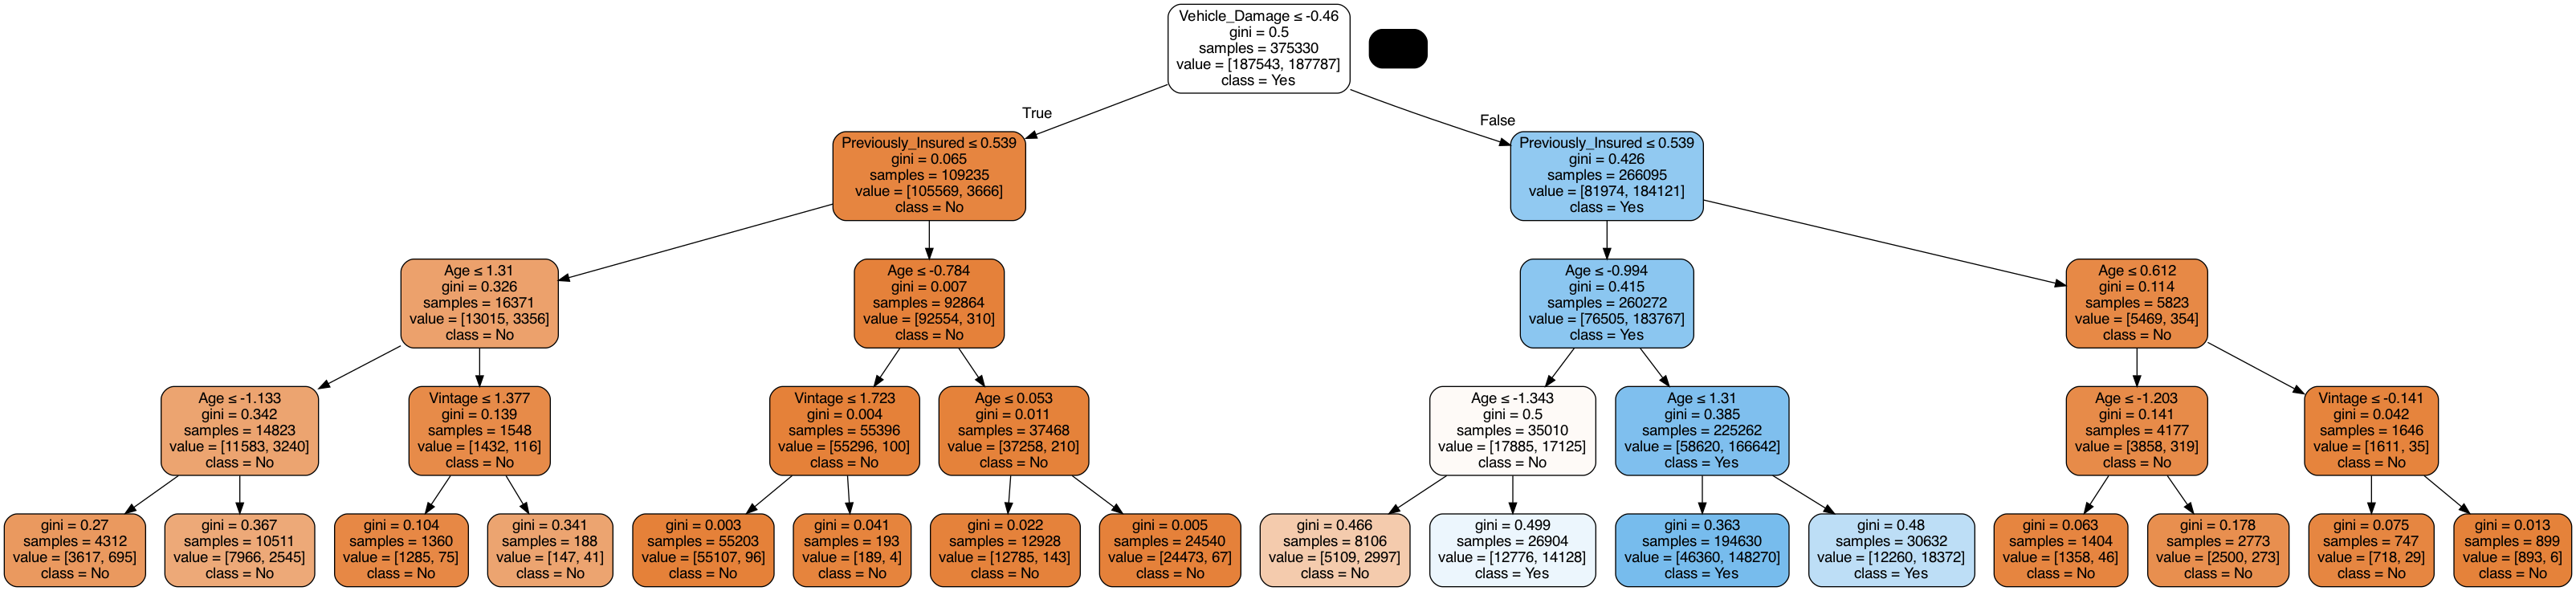

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,  special_characters=True,
               feature_names=X.columns, class_names=['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())